# Проверка гипотез по увеличению выручки интернет-магазина

Целью исследования является проверка гипотез по увеличению выручки интернет-магазина. Проверку гипотез планируется осуществлять с помощью приоритезации и А/В-теста.

Данные для приоритезации гиортез будут взяты у специалистов выдвинувших и описавших гипотезы. План работ следующий: <div>1. Данные для проведения А/В теста будут накоплены в ходе проведения эксперимента.
<div>2. Для достижения целей необходимо провести приоритезацию гипотез и проанализировать результаты А/В-теста.
<div>3. Принимаем решение для продолжения или остановки А/В-теста.

# Часть 1. Приоритизация гипотез.

## Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.


In [1]:
#импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt

#ознакомимся с гипотезами
data = pd.read_csv('C:\\Users\\algol\\Downloads\\hypothesis.csv', sep=',')
#Чтобы вывести полное название гипотез
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(data)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Описание данных:  
Hypothesis — краткое описание гипотезы;  
Reach — охват пользователей по 10-балльной шкале;  
Impact — влияние на пользователей по 10-балльной шкале;  
Confidence — уверенность в гипотезе по 10-балльной шкале;  
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
#приведем названия столбцов к нижнему регистру
data.columns = [x.lower() for x in data.columns]
#добавим столбец с параметром ICE
data['ICE'] = (
    data['impact']
    * data['confidence']) / data['efforts']
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Вывод. Отметим, что по параметру ICE наиболее перспективные гипотезы 8, 0, 7, 6 и 2.

## Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
 

In [3]:
#добавим столбец с параметром RICE

data['RICE'] = (data['reach']*
    data['impact']
    * data['confidence']) / data['efforts']
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150
display(data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Вывод. Отметим, что по параметру RICE в пятерку наиболее перспективных гипотез попадают следующие: <div>-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
<div>-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
<div>-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
<div>-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
<div>-Запустить акцию, дающую скидку на товар в день рождения.

## Проанализируем, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
 

На первое место для параметра RICE вышла гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" это произошло потому, что у нее параметр Reach=10 и является наибольшим из всех. Однако отмечу, что все 5 гипотез: <div>-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;	
<div>-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
<div>-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
<div>-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;	
<div>-Запустить акцию, дающую скидку на товар в день рождения,<div> имеются в наибольших приоритетах RICE и ICE. Логично работать с гипотезами именно из этого списка. 

# Часть 2. Анализ A/B-теста.

In [4]:
#ознакомимся с датафреймами
orders = pd.read_csv('C:\\Users\\algol\\Downloads\\orders.csv', sep=',')
#переведем формат дат
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv(
    'C:\\Users\\algol\\Downloads\\visitors.csv', sep=','
)

#переведем формат дат
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Описание данных:    
transactionId — идентификатор заказа;  
visitorId — идентификатор пользователя, совершившего заказ;  
date — дата, когда был совершён заказ;  
revenue — выручка заказа;  
group — группа A/B-теста, в которую попал заказ;  
date — дата;  
group — группа A/B-теста;  
visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

In [21]:
#проверим наличие пропущенных значений
orders.isna().sum()
visitors.isna().sum()
#пропущенные значения не найдены
##проверим наличие дубликатов
orders.duplicated().sum()
visitors.duplicated().sum()
#дубликаты не найдены

0

Строки кода проверки пропусков и дубликатов вводились последовательно и исполнялись, везде были нули.


In [6]:
#найдем количество пользователей попавших в группы А и B одновременно
duplicated_users = orders.groupby('visitorId').agg({'group':['nunique', 'unique']})
duplicated_users.columns = ['groups', 'names']
duplicated_users1 = duplicated_users.query('groups>1')
display(len(duplicated_users1))
#посчитаем процент пользователей попавших в обе группы от общего числа пользователей
display(len(duplicated_users1)/len(duplicated_users)*100)
#display(duplicated_users1)


58

5.625606207565471

Получается 58 пользователей состоит в обоих группах. Это составляет 5,6% от общего числа, что многовато. Заказчик учебного проекта был проинформирован о наличии такого количества совпадающих пользователей и принял решение их оставить без изменений и продолжить тест.

## Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.


In [7]:
#собираем и смотрим кумулятивные данные
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = datesGroups.apply(lambda x: orders[np\
.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np
.logical_and(visitors['date'] <= x['date'],
visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, 
left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue',
                          'visitors']

display(cumulativeData.head(5))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Text(2019-08-05, 2000000, 'отрыв')

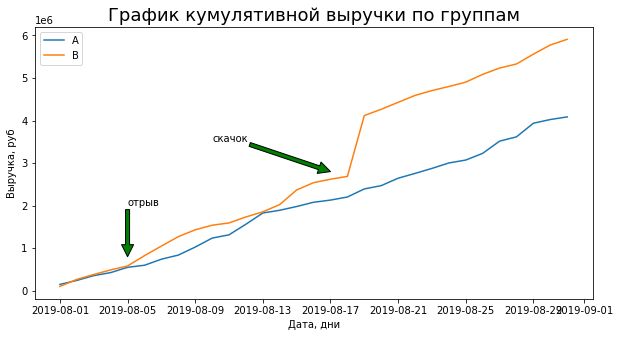

In [8]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters() #для устранения предупреждений об ошибке

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date',
                                            'revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date',
                                            'revenue', 'orders']]

plt.figure(figsize=(10, 5))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'],
         label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'],
         label='B')
plt.legend()
plt.title('График кумулятивной выручки по группам', fontsize=18)
plt.xlabel("Дата, дни")
plt.ylabel("Выручка, руб")
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10',
                        3500000),arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05',
                        2000000), arrowprops=dict(facecolor='g')) 

В середине теста группа В резко вырывается вперед и остается на этом уровне до конца теста. Вероятно, это аномально большие заказы, которые влияют на результаты. Их нужно удалить для окончательного анализа.

## Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Text(2019-08-10, 8000, 'скачок')

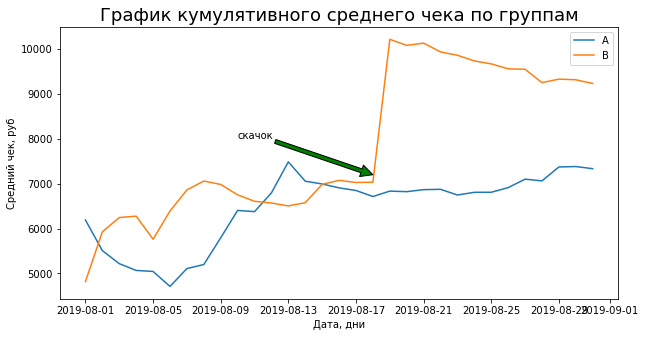

In [9]:
plt.figure(figsize=(10, 5))
plt.plot(cumulativeRevenueA['date'], 
cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], 
cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('График кумулятивного среднего чека по группам', fontsize=18)
plt.xlabel("Дата, дни")
plt.ylabel("Средний чек, руб")
plt.annotate('скачок', xy=('2019-08-18', 7200), xytext=('2019-08-10', 8000),
            arrowprops=dict(facecolor='g'))


В тот же период времени, что и для выручки в группе В происходит аномальный рост среднего чека. Такие чеки нужно найти и исключить. 

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.


Text(2019-08-05, 0.45, 'Резкое падение')

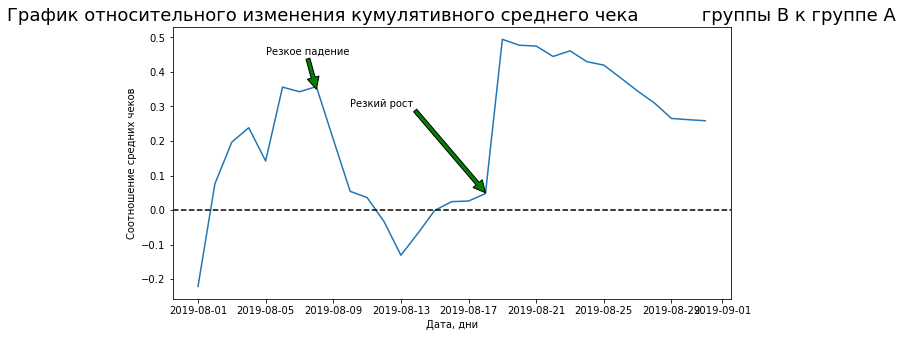

In [10]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(10, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека \
          группы В к группе А', fontsize=18)
plt.xlabel("Дата, дни")
plt.ylabel("Соотношение средних чеков")
plt.annotate('Резкий рост', xy=('2019-08-18', 0.05), 
             xytext=('2019-08-10', 0.3),
            arrowprops=dict(facecolor='g'))
plt.annotate('Резкое падение', xy=('2019-08-08', 0.35), 
             xytext=('2019-08-05', 0.45),
            arrowprops=dict(facecolor='g'))

Соотношение средних чеков групп А и В указывает, что аномальные заказы были не в одном периоде, а в нескольких. На это указывает резкое падение и затем резкий рост кривой соотношения в средних чеках. 

## Построим график кумулятивной конверсии по группам. Сделаем выводы и предположения.


Text(2019-08-01, 0.037, 'Падение')

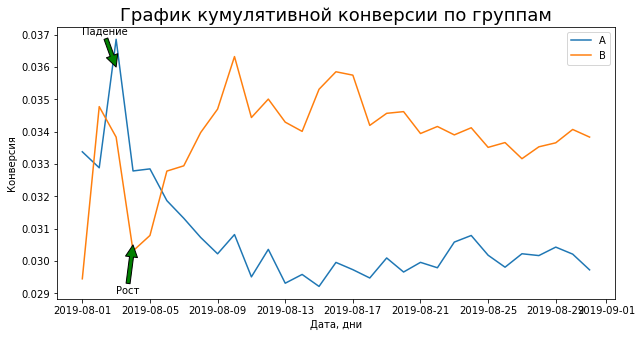

In [11]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = (cumulativeData['orders']/
cumulativeData['visitors'])

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(10, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивной конверсии по группам', fontsize=18)
plt.xlabel("Дата, дни")
plt.ylabel("Конверсия")
plt.annotate('Рост', xy=('2019-08-04', 0.0305), xytext=('2019-08-03', 0.029),
            arrowprops=dict(facecolor='g'))
plt.annotate('Падение', xy=('2019-08-03', 0.036), xytext=('2019-08-01', 0.037),
            arrowprops=dict(facecolor='g'))

В начале тестирования график сильно колебался. Затем конверсия группы В стала заметно больше, чем конверсия группы А.

## Построим график относительного изменения кумулятивной конверсии группы B к группе A. Сделаем выводы и предположения.


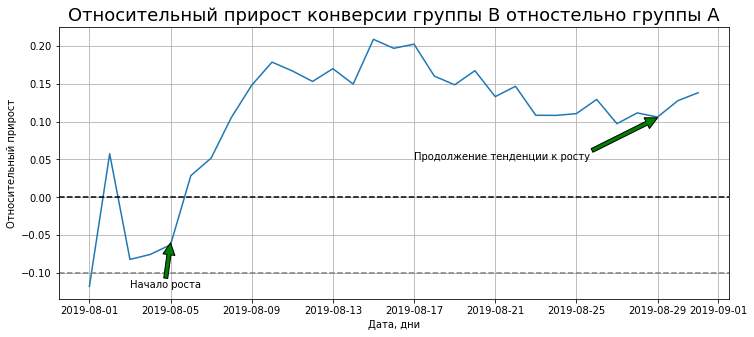

In [12]:
mergedCumulativeConversions = (cumulativeDataA[['date','conversion']]
.merge(cumulativeDataB[['date','conversion']], left_on='date', 
       right_on='date', how='left', suffixes=['A', 'B']))
plt.figure(figsize=(12, 5))
plt.plot(mergedCumulativeConversions['date'], 
mergedCumulativeConversions['conversionB']/
mergedCumulativeConversions['conversionA']-1, 
label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы В отностельно группы А', 
          fontsize=18)
plt.xlabel("Дата, дни")
plt.ylabel("Относительный прирост")
plt.annotate('Начало роста', xy=('2019-08-05', -0.06), xytext=('2019-08-03',
                                                               -0.12),
            arrowprops=dict(facecolor='g'))
plt.annotate('Продолжение тенденции к росту', xy=('2019-08-29', 0.105), 
             xytext=('2019-08-17', 0.05), arrowprops=dict(facecolor='g'))
plt.grid(True)

Прирост конверсии группы В относительно А не сразу, но начал уверенно расти, потом немного рост спал. В последнее время видна тенденция к росту. 

## Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.


Text(0, 0.5, 'Количество заказов, шт')

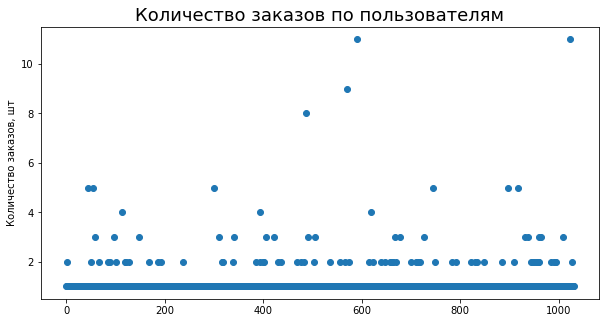

In [13]:
#Подсчитаем количество заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
#Построим точечную диаграмму числа заказов на одного пользователя
ordersByUsers.columns = ['visitorId', 'orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Количество заказов по пользователям', fontsize=18)
plt.ylabel("Количество заказов, шт")

Большинство покупателей заказывали только один раз. доля пользователей с 2 заказами также велика. Заметна линия точек для 3х заказов. Выше 3х заказов точки разбросаны и редки. 

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.


In [14]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))


[2. 4.]


Не более 5% пользователей оформляли больше, чем 2 заказа. Не более 1% пользователей оформляли больше, чем 4 заказа.  Посчитаем возможным выбрать 4 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.

## Построим точечный график стоимостей заказов. Сделаем выводы и предположения.


Text(0, 0.5, 'Выручка по заказам, руб')

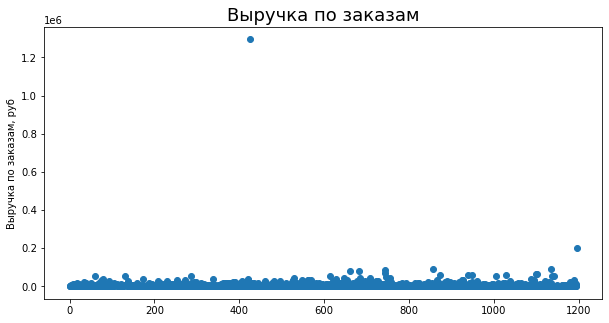

In [15]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10, 5))
plt.scatter(x_values, orders['revenue'])
plt.title('Выручка по заказам', fontsize=18)
plt.ylabel("Выручка по заказам, руб")

Разница в выручке по заказам мало заметна на графике из-за 2х аномальных заказов. Похоже все укладываются в границу менее 150000.

## Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.


In [16]:
print(np.percentile(orders['revenue'], [95, 99]))


[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Точечный график не совсем нагляден оказался. Выбираем нижнюю границу определения аномальных заказов 58233 рубля. 

## Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. Сделаем выводы и предположения.

<div>1. Формируем нулевую гипотезу о равенстве конверсий групп А и В по "сырым" данным. <div>2. Альтернативная гипотеза  предполагает, что конверсии не равны. 

Учитывая, что выборка имеет выбросы применим критерий Манна-Уитни. 

In [17]:
#создадим переменные с количеством посетителей групп А и В. 
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders'].
#В них для пользователей, которые заказывали хотя бы 1 раз, 
#укажем число совершённых заказов.
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
# Объявим переменные sampleA и sampleB, 
#в которых пользователям из разных групп будет соответствовать количество заказов.
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
#Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.017
0.138


p-value = 0.017, что меньше 0.05. Значит по «сырым» данным есть различия в конверсии групп A и B. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%. 

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

<div>1. Формируем нулевую гипотезу о равенстве средних чеков групп А и В по "сырым" данным. <div>2. Альтернативная гипотеза  предполагает, что средние чеки не равны. 

In [18]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']
['revenue'], orders[orders['group']=='B']['revenue'], 
            alternative='two-sided')[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']
    .mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value значительно больше 0.05. Значит, нулевую гипотезу не отвергаем. Средний чек группы В значительно (на 26%) выше среднего чека группы А по "сырым" данным.

## Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделаем выводы и предположения.

<div>1. Формируем нулевую гипотезу о равенстве конверсии групп А и В по "очищенным" данным. <div>2. Альтернативная гипотеза  предполагает, что конверсии не равны. 

In [19]:
#Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders 
#и пользователей, совершивших заказы дороже 58233 рублей — usersWithExpensiveOrders.
#В обоих случаях исключим 1% пользователей. 
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 4]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 4]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 58233]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
#отфильтруем выборки групп А и В с исключением аномальных пользователей (15 человек)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsADaily['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsBDaily['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#Применим статистический критерий Манна-Уитни к отфильтрованным выборкам:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))


0.014
0.153


Результаты по конверсии между "сырыми" и "очищенными" данными практически одинаковы.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

<div>1. Формируем нулевую гипотезу о равенстве средних чеков групп А и В по "очищенным" данным. <div>2. Альтернативная гипотеза  предполагает, что средние чеки не равны. 

In [20]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.851
-0.006


Результаты по среднему чеку для P-value не различаются между "сырыми" и "очищенными" данными. Но по "очищенным" данным группа В стала немного (0,6%) проигрывать группе А по среднему чеку.  По "сырым" данным группа В выигрывала группу А на 26%. Это значит, что основной прирост в группе В давали аномальные пользователи. 

## Решения: 

<div>1. Очищенные данные показывают, что статистически значимых различий между группами по среднему чеку не появилось. Статистически значимое различие по конверсии есть. <div>2. Конверсия группы В выше, чем конверсия группы А на 15,3%.
<div>Решение: <div>Пусть средний чек не вырос, но конверсия выросла. Поэтому тестирование можно завершить и признать тест успешным.   

**Общие выводы по проекту**:<div>1. При анализе данных пропусков и дубликатов не выявлено. Но есть посетители, которые есть в группах А и В одновременно. В идеале таких случаев не должно быть вообще. Если они есть, нужно идти просить разработчиков внести исправления в систему.
    <div>2. Выявлены 5 приоритетных гипотез: <div>-Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок; <div>-Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
<div>-Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
<div>-Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;	
<div>-Запустить акцию, дающую скидку на товар в день рождения.
<div>3. Анализ данных и результаты А/В теста показывают следующее: <div>- Статистически значимых различий между группами по среднему чеку не появилось. Статистически значимое различие по конверсии есть. <div>- Конверсия группы В выше, чем конверсия группы А на 15,3%.
<div>- Пусть средний чек не вырос, но конверсия выросла. Поэтому тестирование можно завершить и признать тест успешным. 